Code for scraping Harham.com

In [1]:
import requests, bs4, time
import pandas as pd
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup as soup
from datetime import date
import os
import re
import matplotlib.pyplot as plt
import scraping_funcs_harnham as sf
import cleaning_funcs_harnham as cf


In [16]:
files = os.listdir('C:/Users/lundr/DataScienceJobs/data/harnham_raw_pickles/')
files

# if there are checkpoints in the folder these will need t be deleted

['.ipynb_checkpoints', 'UK11novRaw.pkl', 'USA11novRaw.pkl']

In [17]:
import pickle
info = pd.DataFrame(columns = ["job_ref","job_title","location","salary","description","type","country","extraction_date","url"])

import os

for i in os.listdir('C:/Users/lundr/DataScienceJobs/data/harnham_raw_pickles/'):
    
    read_in = pd.read_pickle("C:/Users/lundr/DataScienceJobs/data/harnham_raw_pickles/"+i)
    info = pd.concat([info,read_in],ignore_index = True, axis = 0, sort=True)

In [18]:
info

,country,description,extraction_date,job_ref,job_title,location,salary,type,url
0,UK,"['Data ScientistLondon£70,000 - £75,000 + Bene...",4-11-2019,[VACNfn],Data Scientist,[London],£70000 - £75000 per annum,Permanent,/job/data-scientist-in-london-jid-20689
1,UK,"['Quantitative ResearcherLondon£60,000 base sa...",4-11-2019,[VanfNM32],Quantitative Researcher,[London],£55000 - £65000 per annum + Benefits,Permanent,/job/quantitative-researcher-in-london-jid-23579
2,UK,"['Senior Data Scientist - forecasting', 'Londo...",4-11-2019,[670161/KD],Senior Data Scientist - forecasting,[London],£45000 - £55000 per annum + benefits + bonus,Permanent,/job/senior-data-scientist-forecasting-in-lond...
3,UK,['Data ScientistUnicorn Tech Company - Healthc...,4-11-2019,[VACNRM],Data Scientist,[London],£70000 - £80000 per annum + Benefits,Permanent,/job/data-scientist-ai-health-tech-in-london-j...
4,UK,"['Data ScientistLondon£70,000 - £75,000 + Bonu...",4-11-2019,[VAC-NRM29y],Data Scientist,[London],£70000 - £75000 per annum + Bonus,Permanent,/job/data-scientist-in-london-jid-22183
...,...,...,...,...,...,...,...,...,...
1707,USA,"['VP Engineering -.NET', 'Greater Dallas Area'...",4-11-2019,[69149/KK2],VP Engineering -.NET,"[Dallas, Texas]",US$200000 - US$220000 per annum + Additional B...,Permanent,/job/vp-engineering-net-in-dallas-texas-jid-24007
1708,USA,"['The Company:', 'This Real Estate Investment ...",4-11-2019,[555],The Company,"[San Mateo, California]",US$560 - US$680 per day,Contract,/job/bi-strategy-lead-contract-to-hire-in-san-...
1709,USA,"['VP of EngineeringMinneapolis$220,000 ', ""A G...",4-11-2019,[23423/SN],VP of Engineering,"[Minneapolis, Minnesota]",US$24385 - US$268235 per annum + Benefits,Permanent,/job/vp-of-engineering-in-minneapolis-minnesot...
1710,USA,['Product Owner - Big DataBoston - H1B Sponsor...,4-11-2019,[646609/SN],Product Owner - Big Data,"[Boston, Massachusetts]",US$182887 - US$243850 per annum + Benefits,Permanent,/job/product-owner-big-data-in-boston-massachu...


In [20]:
# run data cleaning functions
info['description']=cf.remove_duped_info(info['description'],[info['job_title'],info['location']])
info['description']=cf.clean_column(info['description'])
info['location']=cf.clean_column(info['location'])

info['salary_low'],info['salary_high']=cf.create_split_salary_range(info['salary'])
info['salary_low']=cf.clean_salary(info['salary_low'],'£')
info['salary_high']=cf.clean_salary(info['salary_high'],'£')

info['salary_low']=pd.to_numeric(info['salary_low'])

In [21]:
info.columns
#info['salary_average'] = (info['salary_low']+info['salary_high'])/2

Index(['job_ref', 'job_title', 'location', 'salary', 'description', 'type',
       'url', 'salary_low', 'salary_high'],
      dtype='object')

In [22]:
#add correct column headings and new columns

import numpy as np
import datetime

info.columns = ['ref_code', 'job_title', 'location', 'salary', 'description', 'jobtype','url',
       'salary_low', 'salary_high']

#company: Company or recruiter advertising the job
info['company'] = 'Harnham'

#industry: which industry sector
    
info['industry'] = np.nan

#education: required level and subject of education

info['education'] = np.nan

#**career: **
info['career'] = np.nan

#duration: How long the job had been advertised for at time of scraping
info['duration'] = np.nan

#url infom was scraped from
#info['url'] = links
#info['url'] = np.nan
#extraction date




info['extraction_date'] = date.today()

In [23]:
info.head()

,ref_code,job_title,location,salary,description,jobtype,url,salary_low,salary_high,company,industry,education,career,duration,salary_average,extraction_date
0,[VACNfn],Data Scientist,London,£70000 - £75000 per annum,london - the company ...,Permanent,/job/data-scientist-in-london-jid-20689,70000,75000,Harnham,NaN,NaN,NaN,NaN,72500.0,2019-11-05
1,[VanfNM32],Quantitative Researcher,London,£55000 - £65000 per annum + Benefits,london base salary the company ...,Permanent,/job/quantitative-researcher-in-london-jid-23579,55000,65000,Harnham,NaN,NaN,NaN,NaN,60000.0,2019-11-05
2,[670161/KD],Senior Data Scientist - forecasting,London,£45000 - £55000 per annum + benefits + bonus,london - the c...,Permanent,/job/senior-data-scientist-forecasting-in-lond...,45000,55000,Harnham,NaN,NaN,NaN,NaN,50000.0,2019-11-05
3,[VACNRM],Data Scientist,London,£70000 - £80000 per annum + Benefits,unicorn tech company - healthcare sector ...,Permanent,/job/data-scientist-ai-health-tech-in-london-j...,70000,80000,Harnham,NaN,NaN,NaN,NaN,75000.0,2019-11-05
4,[VAC-NRM29y],Data Scientist,London,£70000 - £75000 per annum + Bonus,london - bonus the comp...,Permanent,/job/data-scientist-in-london-jid-22183,70000,75000,Harnham,NaN,NaN,NaN,NaN,72500.0,2019-11-05


In [24]:
#pickle the cleaned data
info.to_pickle("C:/Users/lundr/DataScienceJobs/data/UK11novClean.pkl")

In [30]:
# check for salary anomalies and manually correct
info[info['salary_high']/info['salary_low']>3]

,ref_code,job_title,location,salary,description,jobtype,url,salary_low,salary_high,company,industry,education,career,duration,salary_average,extraction_date
154,[453931/KD],Innovative Lead Data Scientist,London,£1 - £80000 per annum + benefits + bonus,manchester - b...,Permanent,/job/innovative-lead-data-scientist-in-london-...,1,80000,Harnham,NaN,NaN,NaN,NaN,40000.5,2019-11-05
164,[VAC-22812],Data Scientist | Asset Management,London,£50000 - £650000 per annum + Benefits,lead data scientistlondon - ...,Permanent,/job/data-scientist-in-london-jid-2435,50000,650000,Harnham,NaN,NaN,NaN,NaN,350000.0,2019-11-05
522,[57908],Operations Analyst,London,£35000 - £450001 per annum + Additional Benefits,london the company wo...,Permanent,/job/operations-analyst-in-london-jid-18824,35000,450001,Harnham,NaN,NaN,NaN,NaN,242500.5,2019-11-05
639,[VAC - 56296],Senior Digital Product Owner,London,£10000 - £80000 per annum + Additional Benefits,london - the com...,Permanent,/job/senior-digital-product-owner-in-london-ji...,10000,80000,Harnham,NaN,NaN,NaN,NaN,45000.0,2019-11-05
972,[56804/RK],Data Engineering Manager,London,£100000 - £800000 per annum,up to london the company...,Permanent,/job/data-engineering-manager-in-london-jid-21817,100000,800000,Harnham,NaN,NaN,NaN,NaN,450000.0,2019-11-05
997,[66657/AV],"Senior Java Software Engineer - Spark, AWS, Mi...",London,£65000 - £700000 per annum + Flexible working,london salary - ...,Permanent,/job/senior-software-engineer-java-in-london-j...,65000,700000,Harnham,NaN,NaN,NaN,NaN,382500.0,2019-11-05


In [45]:

#correct the mistake
#info.loc[info['salary_high']==max(info['salary_high']),'salary_high']=65000
info['salary_low'][154]  = info['salary_high'][154] 
info['salary_high'][164] = 65000
info['salary_high'][522] = 45000
info['salary_low'][639] = 80000
info['salary_high'][639] = 100000
info['salary_high'][639] = 80000
info['salary_high'][972] = 80000
info['salary_high'][997] = 70000

info['salary_average'] = (info['salary_low']+info['salary_high'])/2

C:\Users\lundr\AppData\Local\Continuum\anaconda3\envs\dsj\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lundr\AppData\Local\Continuum\anaconda3\envs\dsj\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\lundr\AppData\Local\Continuum\anaconda3\envs\dsj\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

Plot data

In [39]:
info['jobtype']

0       Permanent
1       Permanent
2       Permanent
3       Permanent
4       Permanent
          ...    
1165     Contract
1166    Permanent
1167    Permanent
1168    Permanent
1169     Contract
Name: jobtype, Length: 1170, dtype: object

C:\Users\lundr\AppData\Local\Continuum\anaconda3\envs\dsj\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\lundr\AppData\Local\Continuum\anaconda3\envs\dsj\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  6., 122., 192., 265., 243., 114.,  56.,  32.,  16.,   9.]),
 array([ 12000.,  23800.,  35600.,  47400.,  59200.,  71000.,  82800.,
         94600., 106400., 118200., 130000.]),
 <a list of 10 Patch objects>)

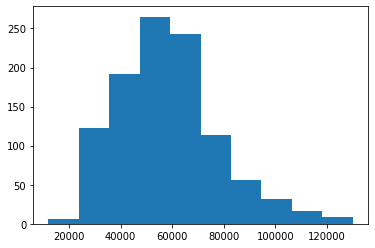

In [47]:
#plt.hist(info['salary_average'][info['jobtype']!='Contract'])
plt.hist(info['salary_average'])

In [48]:
info[info['salary_low']>2000].groupby(by='location').agg({'salary_average' : ['count','mean','median','min','max']})

salary_average                         \
                                            count          mean   median   
location                                                                   
  Basingstoke  Hampshire                        2  50000.000000  50000.0   
  Birmingham  West Midlands                     3  57500.000000  47500.0   
  Bromley  Kent                                 4  70625.000000  77500.0   
  Buckinghamshire                               1  60000.000000  60000.0   
  Cambridge  Cambridgeshire                     6  48333.333333  52500.0   
  Cambridgeshire                                2  50000.000000  50000.0   
  Chatham  Kent                                 1  34000.000000  34000.0   
  Chiswick  London                              2  46250.000000  46250.0   
  City of London  London                      185  62762.162162  60000.0   
  Coventry  West Midlands                       2  83750.000000  83750.0   
  Darlington  County Durham                     1  45000.000000  45000.0   
  East London  London                           1  45000.000000  45000.0   
  East Sussex                                   1  67500.000000  67500.0   
  Edinburgh                                     3  64166.666667  67500.0   
  Farnham  Surrey                               3  49166.666667  47500.0   
  Greater Manchester                            2  43750.000000  43750.0   
  Hampshire                                     2  51250.000000  51250.0   
  Hatfield  Hertfordshire                       1  34000.000000  34000.0   
  Hertfordshire                                17  53470.588235  47500.0   
  Kent                                          7  44285.714286  34000.0   
  Leatherhead  Surrey                           1  55000.000000  55000.0   
  Leeds  West Yorkshire                        19  38000.000000  41000.0   
  Leicestershire                                2  45000.000000  45000.0   
  Lincolnshire                                  1  42500.000000  42500.0   
  London                                      673  59637.815750  57500.0   
  Luton  Bedfordshire                           5  70000.000000  70000.0   
  Manchester  Greater Manchester               17  45000.000000  45000.0   
  Milton Keynes  Buckinghamshire                5  48600.000000  47500.0   
  Morley  West Yorkshire                        1  30000.000000  30000.0   
  North London  London                          6  46083.333333  50000.0   
  Northamptonshire                              1  40000.000000  40000.0   
  Nottingham  Nottinghamshire                   8  61562.500000  66250.0   
  Peterborough  Cambridgeshire                  2  56250.000000  56250.0   
  Reading  Berkshire                            3  52666.666667  50000.0   
  Richmond upon Thames  London                  7  41071.428571  37500.0   
  Sheffield  South Yorkshire                    5  41100.000000  40000.0   
  Slough  Berkshire                             1  32000.000000  32000.0   
  South East London  London                     1  65000.000000  65000.0   
  South West London  London                     4  46750.000000  48750.0   
  Southwark  London                             1  70000.000000  70000.0   
  St  Albans  Hertfordshire                     1  41500.000000  41500.0   
  Suffolk                                       3  44166.666667  40000.0   
  Surrey                                        6  56250.000000  56250.0   
  Swindon  Wiltshire                            1  75000.000000  75000.0   
  Twickenham  London                            1  35000.000000  35000.0   
  Watford  Hertfordshire                       11  41636.363636  45000.0   
  West End  London                              5  68500.000000  70000.0   
  West London  London                          11  43545.454545  41000.0   
  West Midlands                                 1  37500.000000  37500.0   
  West Sussex                                   1  67500.000000  67500.0   
  Wimbl